In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [70]:
#If you had studied longer, would your overall scores get any better
#One way of answering this question is by having data on how long you studied for and what scores you got. 
#We can then try to see if there is a pattern in that data, and if in that pattern, when you add to the hours, 
#it also ends up adding to the scores percentage.

#For instance, say you have an hour-score dataset, which contains entries such as 1.5h and 87.5% score. 
#It could also contain 1.61h, 2.32h and 78%, 97% scores. The kind of data type that can have any intermediate
#value (or any level of 'granularity') is known as continuous data.

#Based on the modality (form) of your data - to figure out what score you'd get based on your study time - 
# you'll perform regression or classification.


In [71]:
### IMPORTANT ###
# Regression is performed on continuous data, while classification is performed on discrete data.
# Regression can be anything from predicting someone's age, the house of a price, or value of any variable.
# Classification includes predicting what class something belongs to (such as whether a tumor is benign or
# malignant).

In [72]:
# For both regression and classification - we'll use data to predict labels
# (umbrella-term for the target variables). Labels can be anything from "B" (class)
# for classification tasks to 123 (number) for regression tasks. 
# Because we're also supplying the labels - these are supervised learning algorithms.

In [73]:
# Load the data
df = pd.read_csv('student_scores.csv')

In [74]:
# Let's do Exploratory Analysis (quick look for the first 5 elements in the data: the head)
print(df.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [75]:
# Let's check the shape of the data set
df.shape

(25, 2)

In [76]:
# We are looking for the relationship between grades and scores. Scatterplots are a great way to explore
# relationships. Observe that as the hours go up, so do the grades: this is a fairly positive correlation!
# The shapes created by the points in the plots point towards a line, so this looks like a "positive linear
# correlation"

<AxesSubplot: title={'center': 'Scatterplot of hours and scores percentages'}, xlabel='Hours', ylabel='Scores'>

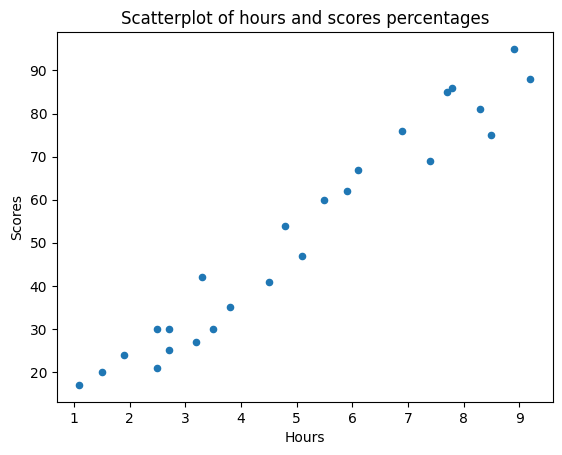

In [77]:
#plt.scatter(x=df['Hours'], y=df['Scores'])
#plt.title('Scatterplot of hours and scores percentages')

df.plot.scatter(x='Hours', y='Scores', title='Scatterplot of hours and scores percentages')

In [78]:
# Let's display in a Data Frame the correlations, using the method "corr()"
# Correlation between hours and scores is 0.97 (anything above 0.8 is considered to be "high").
# When we have a linear relationship between two variables we obtain a line; in the case of three or more
# variables, then we are looking at an intersection of planes.
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [79]:
#Using pandas' describe, we get for free some statitical summaries.
print(df.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [80]:
# Because of linearity, we will use y = ax + b. 
# y representes the score percentage
# x represents the hours studied
# b is where the line starts at the Y-axis (called Y-axis intercept)
# a defines whether the line is going to move up/down in the graph (after all, it is the slope).

In [81]:
#### IMPORTANT ###
# By adjusting the slope and intercept of the line, we can move it in any direction.
# Thus - by figuring out the slope and intercept values, we can adjust a line to fit our data!

# That's the heart of linear regression and an algorithm really only figures out the values of the slope
# and intercept. It uses the values of x and y that we already have and varies the values of a and b. 
# By doing that, it fits multiple lines to the data points and returns the line that is closer to all the
# data points, or the best fitting line. By modelling that linear relationship, our regression algorithm
# is also called a model. In this process, when we try to determine, or predict the percentage based on
# the hours, it means that our y variable depends on the values of our x variable.

In [82]:
### DATA PRE-PROCESSING ###
# Let's divide the data frame in 2 arrays: one for the independent variable (y) and one for the dependent one (x)
y = df['Scores'].values.reshape(-1, 1)
X = df['Hours'].values.reshape(-1, 1)

In [83]:
print('X shape:', X.shape)
print('X:', X)
print('X shape:', y.shape)
print('Y:', y)

X shape: (25, 1)
X: [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
X shape: (25, 1)
Y: [[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


In [84]:
print(df['Hours'].values) # [2.5 5.1 3.2 8.5 3.5 1.5 9.2 ... ]
print(df['Hours'].values.shape) # (25,)

[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8]
(25,)


In [85]:
# The Liner Rgression model expects a 2D input.
# We will "split" our data for training and validation/test purposes

In [86]:
# As sampling is random, we will use the parameter random_state to use always the same seed: 42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [87]:
print(X_train)
print(y_train)

[[2.7]
 [3.3]
 [5.1]
 [3.8]
 [1.5]
 [3.2]
 [4.5]
 [8.9]
 [8.5]
 [3.5]
 [2.7]
 [1.9]
 [4.8]
 [6.1]
 [7.8]
 [5.5]
 [7.7]
 [1.1]
 [7.4]
 [9.2]]
[[25]
 [42]
 [47]
 [35]
 [20]
 [27]
 [41]
 [95]
 [75]
 [30]
 [30]
 [24]
 [54]
 [67]
 [86]
 [60]
 [85]
 [17]
 [69]
 [88]]


In [88]:
# Now, let's train the model. 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Now we need to "fit" the line to our data: we use .fit with our X_tran and y_train data. 
regressor.fit(X_train, y_train)

LinearRegression()

In [89]:
# If no errosr are produced, then the "regressor" found the best fitting line!
# Let's inspect the intercept and the slope, one at a time.

In [90]:
print(regressor.intercept_)

[2.82689235]


In [91]:
print(regressor.coef_)

[[9.68207815]]


In [92]:
# if we were to use our formula, y = ax + b, we would get:
my_hours = 5
score = 9.68207815 * my_hours + 2.82689235
print(score)
# This should evaluate to 51.2 and change.
# Observe that the slope value shows what happens to the dependent variable whenever there 
# is an increase (or decrease) of one unit of the independent variable.

51.237283100000006


In [93]:
# Better to avoid manual calculations, let's create a function for that 
def calc(slope, intercept, hours):
    return slope*hours+intercept

In [94]:
score = calc(regressor.coef_, regressor.intercept_, 9.5)
print(score)

[[94.80663482]]


In [95]:
# Much better, though, if we would use our model to do the prediction:
score = regressor.predict([[9.5]]) # We are passing 9.5 in double brackets to have a 2-dimensional array
print(score)

[[94.80663482]]


In [96]:
# Now in our array we have a score percentage estimate for each  and every hours we can think of.
# Can we trust these estimates? Well, we split the data in 80% for training and 20% for testing.
# To make predictions on the test data, we pass the X_test values to predict(). Let's assign the results
# to the variable y-pred:

In [97]:
y_pred = regressor.predict(X_test)

In [98]:
# y_pred now contains all the predicted values for the input values in the X_test.
# We can now compare the actual output values for X_test with the predicted values, 
# by arranging them side by side in a dataframe structure:

In [99]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

   Actual  Predicted
0      81  83.188141
1      30  27.032088
2      21  27.032088
3      76  69.633232
4      62  59.951153


In [100]:
# Though our model seems not to be very precise, the predicted percentages are close to the actual ones. 
# Let's quantify the difference between the actual and predicted values to gain an objective view of how
# it's actually performing.

In [101]:
### EVALUATING the Model ###
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Root Mean Squared Error
print(f"mae = {mae:.2f}")
print(f"mse = {mse:.2f}")
print(f"rmse = {rmse:.2f}")

mae = 3.92
mse = 18.94
rmse = 4.35


In [102]:
# All of our errors are low - and we're missing the actual value by 4.35 at most (lower or higher),
# which is a pretty small range considering the "volume" of data we have.

In [103]:
### MULTIPLE LINEAR REGRESSION ### Cassia Sampaio: https://stackabuse.com/author/cassia/
# Until this point, we have predicted a value with linear regression using only one variable. There is a different
# scenario that we can consider, where we can predict using many variables instead of one, and this is also a much
# more common scenario in real life, where many things can affect some result.

# For instance, if we want to predict the gas consumption in US states, it would be limiting to use only one
# variable, for instance, gas taxes, to do it, since more than just gas taxes affects consumption. There are more
# things involved in the gas consumption than only gas taxes, such as the per capita income of the people in a
# certain area, the extension of paved highways, the proportion of the population that has a driver's license, 
# and many other factors. Some factors affect the consumption more than others - and here's where correlation 
# coefficients really help!

# In a case like this, when it makes sense to use multiple variables, linear regression becomes
# a "multiple linear regression".

In [104]:
# Petrol Consumption Example: 
#    Helmut Spaeth,
#    Mathematical Algorithms for Linear Regression,
#    Academic Press, 1991,
#    ISBN 0-12-656460-4.

#    S Weisberg,
#    Applied Linear Regression,
#    New York, 1980, pages 32-33.

In [105]:
df = pd.read_csv('petrol_consumption.csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


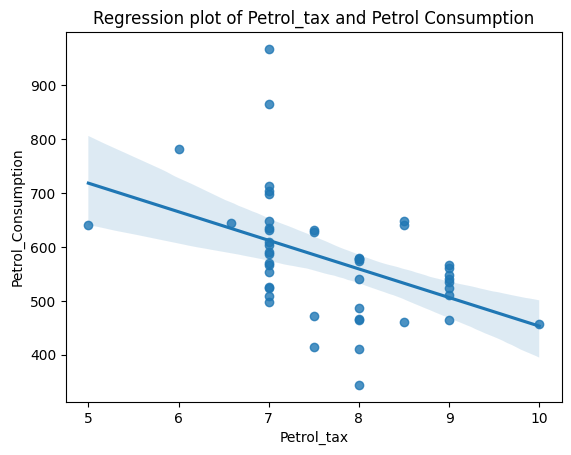

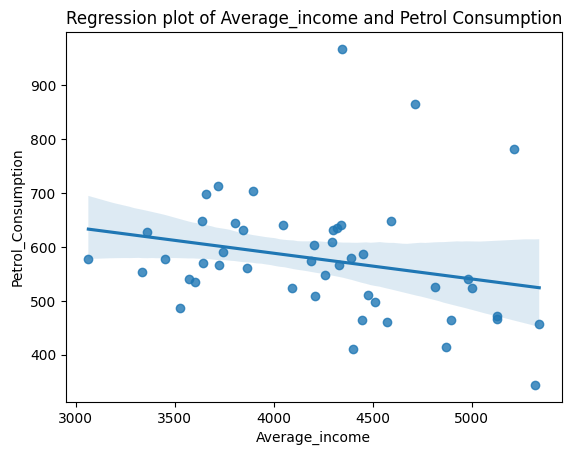

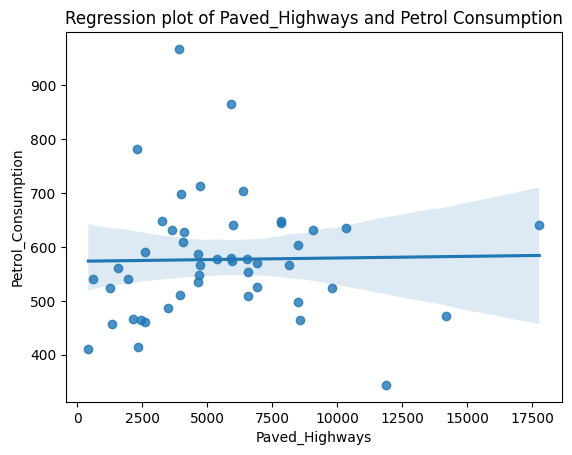

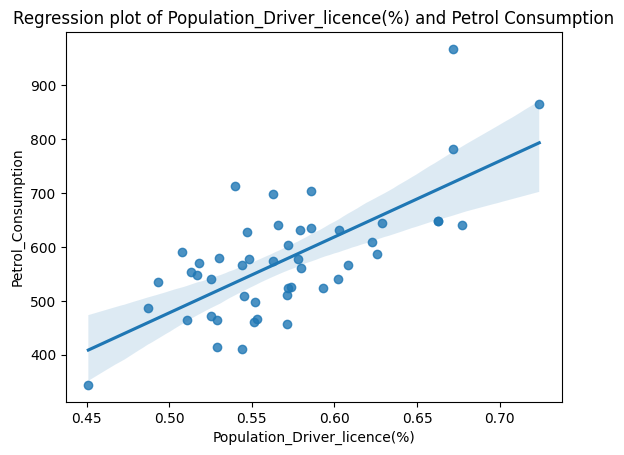

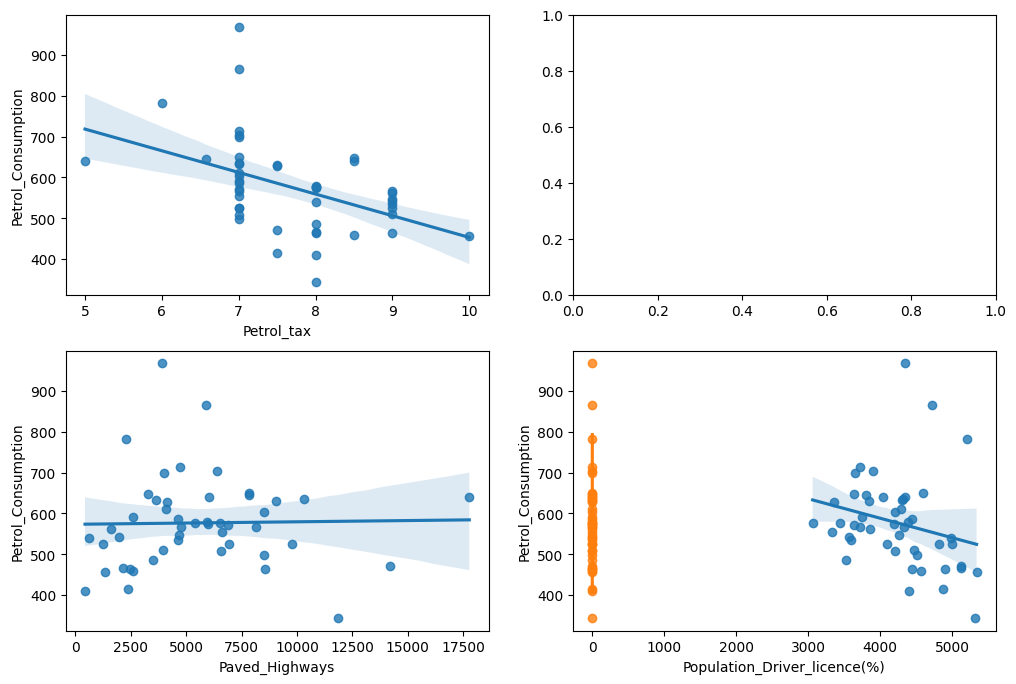

In [106]:
# In out current scenario, we have four independent variables and one dependent variable. To do a scatterplot with all the
# variables would require one dimension per variable, resulting in a 5D plot.
# We could create a 5D plot with all the variables, which would take a while and be a little hard to read
# or we could plot one scatterplot for each of our independent variables and dependent variable to see if there's
# a linear relationship between them.

# We are using regplot in Seaborn, which does a scatterplot that has already incorporated the regression line.

import seaborn as sns # Convention alias for Seaborn

variables = ['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']

for var in variables:
    plt.figure() # Creating a rectangle (figure) for each plot
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.regplot(x=var, y='Petrol_Consumption', data=df).set(title=f'Regression plot of {var} and Petrol Consumption');

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

for index, var in enumerate(variables):
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.regplot(x=var, y='Petrol_Consumption', data=df, ax=ax[int(np.ceil(index/4))][int(np.mod(index, 2))])

In [107]:
# If we analyse the graphs above we will notice that:
# (a) Petrol_tax and Average_income have a weak negative linear relationship with Petrol_Consumption
# (b) Population_Driver_license(%) has a strong positive linear relationship with Petrol_Consumption
# (c) Paved_Highways variable has no relationship with Petrol_Consumption.

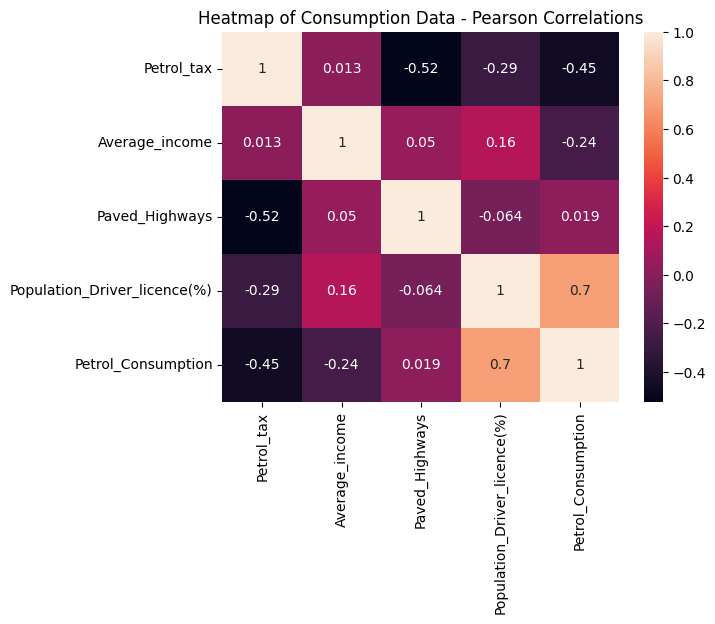

In [108]:
# We can also calculate the correlation of the new variables, this time using Seaborn's heatmap() to help us spot
# the strongest and weaker correlations based on warmer (reds) and cooler (blues) tones. See below:

correlations = df.corr()
# annot=True displays the correlation values
sns.heatmap(correlations, annot=True).set(title='Heatmap of Consumption Data - Pearson Correlations');

In [109]:
# Looking at the heat map, it seems that it corroborates our previous analysis! Petrol_tax and Average_income have a
# weak negative linear relationship of, respectively, -0.45 and -0.24 with Petrol_Consumption. 
# Population_Driver_license(%) has a strong positive linear relationship of 0.7 with Petrol_Consumption, 
# and Paved_Highways correlation is of 0.019 - which indicates no relationship with Petrol_Consumption.

### IMPORTANT ###
# The correlation doesn't imply causation, but we might find causation if we can successfully explain the phenomena
# with our regression model.

### OBSERVATIONS ###
# Another important thing to notice in the regplots is that there are some points really far off from where most points
# concentrate, we were already expecting something like that after the big difference between the mean and std columns
# - those points might be data outliers and extreme values. (See below for mean and std values).

# Outliers and extreme values have different definitions. While outliers don't follow the natural direction of the data,
# and drift away from the shape it makes - extreme values are in the same direction as other points but are either too high
# or too low in that direction, far off to the extremes in the graph.

In [110]:
# A linear regression model, either uni or multivariate, will take these outlier and extreme values into account when 
# determining the slope and coefficients of the regression line. Considering what the already know of the linear regression
# formula:

# score=9.68207815∗hours+2.82689235

# If we have an outlier point of 200 hours, that might have been a typing error - it will still be used to calculate the final
# score:
     # score=9.68207815 ∗ 200 + 2.82689235
     # score=1939.24252235

# Just one outlier can make our slope value 200 times bigger.

# The same holds for multiple linear regression. The multiple linear regression formula is basically an extension of the
# linear regression formula with more slope values:
# y = b0 + (b1 * x1) + (b2 * x2) + (b3 * x3) + ... + bn * xn

# The main difference between this formula from our previous one, is thtat it describes a plane, instead of describing
# a line. We know have (bn * xn) coefficients instead of just (a * x).

# In the same way, if we have an extreme value of 17,000, it will end up making our slope 17,000 bigger:
#     y = b0 + 17,000 * x1 + b2 * x2 + b3 * x3 + ... + bn * xn

# In other words, univariate and multivariate linear models are sensitive to outliers and extreme data values.

In [111]:
# We will facilitate the comparison of the statistics by rounding up the values to two decimals with the round()
# method, and transposing the table with the T property: Our table is now column-wide
print(df.describe().round(2).T)

                              count     mean      std      min      25%  \
Petrol_tax                     48.0     7.67     0.95     5.00     7.00   
Average_income                 48.0  4241.83   573.62  3063.00  3739.00   
Paved_Highways                 48.0  5565.42  3491.51   431.00  3110.25   
Population_Driver_licence(%)   48.0     0.57     0.06     0.45     0.53   
Petrol_Consumption             48.0   576.77   111.89   344.00   509.50   

                                  50%      75%       max  
Petrol_tax                       7.50     8.12     10.00  
Average_income                4298.00  4578.75   5342.00  
Paved_Highways                4735.50  7156.00  17782.00  
Population_Driver_licence(%)     0.56     0.60      0.72  
Petrol_Consumption             568.50   632.75    968.00  


In [112]:
# By looking at the min and max columns of the describe table, we see that the minimum value in our data is 0.45,
# and the maximum value is 17,782. This means that our data range is 17,781.55 (17,782 - 0.45 = 17,781.55),
# very wide - which implies our data variability is also high.

# Also, by comparing the values of the mean and std columns, such as 7.67 and 0.95, 4241.83 and 573.62, etc., 
# we can see that the means are really far from the standard deviations. That implies our data is far from the
# mean, decentralized - which also adds to the variability.

# We already have two indications that our data is spread out, which is not in our favor, since it makes it more
# difficult to have a line that can fit from 0.45 to 17,782 - in statistical terms, to explain that variability.

# Either way, it is always important that we plot the data. Data with different shapes (relationships) can have
# the same descriptive statistics. So, let's keep going and look at our points in a graph.

In [113]:
# Following what has been done with the simple linear regression, after loading and exploring the data, we can divide it
# into features and targets. The main difference is that now our features have 4 columns instead of one.

# We can use double brackets [[ ]] to select them from the dataframe:

y = df['Petrol_Consumption']
X = df[['Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_tax']]

In [114]:
# After setting our X and y sets, we can divide our data into train and test sets.
# We will be using the same seed and 20% of our data for training:

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [115]:
# After splitting the data, we can train our multiple regression model. Notice that now there is no need to reshape our X data,
# once it already has more than one dimension:

X.shape # (48, 4)

(48, 4)

In [116]:
# To train our model we can execute the same code as before, and use the fit() method of the LinearRegression class:

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [117]:
# After fitting the model and finding our optimal solution, we can also look at the intercept:
regressor.intercept_

361.4508790666835

In [118]:
# And at the coefficients of the features:
regressor.coef_

array([-5.65355145e-02, -4.38217137e-03,  1.34686930e+03, -3.69937459e+01])

In [119]:
# Those four values (above) are the coefficients for each of our features in the same order as we have them in our X data.
# To see a list with their names, we can use the dataframe columns attribute:

In [120]:
feature_names = X.columns

In [121]:
# Considering it is a little hard to see both features and coefficients together like this, we can better organize them
# in a table format. To do that, we can assign our column names to a feature_names variable, and our coefficients to a
# model_coefficients variable. After that, we can create a dataframe with our features as an index and our coefficients
# as column values called 

In [122]:
feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_df)

                              Coefficient value
Average_income                        -0.056536
Paved_Highways                        -0.004382
Population_Driver_licence(%)        1346.869298
Petrol_tax                           -36.993746


In [123]:
# If in the linear regression model, we had 1 variable and 1 coefficient, now in the multiple linear regression model,
# we have 4 variables and 4 coefficients. What can those coefficients mean? Following the same interpretation of the
# coefficients of the linear regression, this means that for a unit increase in the average income, there is a decrease
# of 0.06 dollars in gas consumption.

# Similarly, for a unit increase in paved highways, there is a 0.004 descrease in miles of gas consumption; and for a unit
# increase in the proportion of population with a drivers license, there is an increase of 1,346 billion gallons of gas
# consumption.

# And, lastly, for a unit increase in petrol tax, there is a decrease of 36,993 million gallons in gas consumption.

# By looking at the coefficients dataframe, we can also see that, according to our model, the Average_income and Paved_Highways
# features are the ones that are closer to 0, which means they have have the least impact on the gas consumption. 
# While the Population_Driver_license(%) and Petrol_tax, with the coefficients of 1,346.86 and -36.99, respectively, 
# have the biggest impact on our target prediction.

# In other words, the gas consumption is mostly explained by the percentage of the population with driver's license and the
# petrol tax amount, surprisingly (or unsurprisingly) enough.

# We can see how this result has a connection to what we had seen in the correlation heatmap. The driver's license percentua
# had the strongest correlation, so it was expected that it could help explain the gas consumption, and the petrol tax had a
# weak negative correlation - but, when compared to the average income that also had a weak negative correlation - it was the
# negative correlation which was closest to -1 and ended up explaining the model.

# When all the values were added to the multiple regression formula, the paved highways and average income slopes
# ended up becaming closer to 0, while the driver's license percentual and the tax income got further away from 0. 
# So those variables were taken more into consideration when finding the best fitted line.

In [124]:
# To understand if and how our model is making mistakes, we can predict the petrol consumption using our test data and then 
# look at our metrics to be able to tell how well our model is behaving. In the same way we had done for the simple regression
# model, let's predict with the test data:


y_pred = regressor.predict(X_test)

In [125]:
# Npw let's compare our predicyions to the actual output values for X_test. Let's use a DataFrame:

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

    Actual   Predicted
27     631  606.692665
40     587  673.779442
26     577  584.991490
43     591  563.536910
24     460  519.058672
37     704  643.461003
12     525  572.897614
19     640  687.077036
4      410  547.609366
25     566  530.037630


In [126]:
# Here, we have the index of the row of each test data, a column for its actual value and another for its predicted values.
# When we look at the difference between the actual and predicted values, such as between 631 and 607, which is 24, or between
# 587 and 674, that is -87 it seems there is some distance between both values, but is that distance too much?

# Let's evaluate the performance of our multiple linear regression. We want to understand if our predicted values are too far 
# from our actual values. We'll do this in the same way we had previously done, by calculating the MAE, MSE and RMSE metrics.

In [127]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 53.47
Mean squared error: 4083.26
Root mean squared error: 63.90


In [128]:
# We can see that the value of the RMSE is 63.90, which means that our model might get its prediction wrong by adding
# or subtracting 63.90 from the actual value. It would be better to have this error closer to 0, and 63.90 is a big number
# - this indicates that our model might not be predicting very well.

In [129]:
#  the model in a different way, it doesn't consider our individual data values such as MSE, RMSE and MAE, but takes a more
# general approach to the error, the R2:
# The R2 doesn't tell us about how far or close each predicted value is from the real data - it tells us how much of our
# target is being captured by our model. In other words, R2 quantifies how much of the variance of the dependent variable
# is being explained by the model.

#The R2 metric varies from 0% to 100%. The closer to 100%, the better. If the R2 value is negative,
# it means it doesn't explain the target at all.

# We can calculate R2 in Python to get a better understanding of how it works:

actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

R²: 0.391366400143053


In [130]:
# R2 also comes implemented by default into the score method of Scikit-Learn's linear regressor class.
# We can calculate it like this:

regressor.score(X_test, y_test)

0.391366400143053

In [131]:
# So far, it seems that our current model explains only 39% of our test data which is not a good result, 
# it means it leaves 61% of the test data unexplained. Let's also understand how much our model explains of our train data:

regressor.score(X_train, y_train)

0.7068781342155137

In [132]:
# We have found an issue with our model. It explains 70% of the train data, but only 39% of our test data, which is more
# important to get right than our train data. It is fitting the train data really well, and not being able to fit the test
# data - which means, we have an overfitted multiple linear regression model.